In [1]:
import numpy as np
import time

In [2]:
def const(v):
    return v

def summ(v):
    return sum(v)

def prod(v):
    result = 1
    for x in v: 
         result = result * x  
    return result

def polin(v):
    x = 1.5
    ans = 0.0
    for i in range(len(v)):
        ans += v[i] * (x ** i)
    return ans

def horner(v):
    res = 0
    x = 1.5
    prev_sum = v[-1]
    for i in range(len(v) - 1, 0, -1):
        prev_elem = v[i - 1]
        res = prev_elem + x * prev_sum
        prev_sum = res
    return res

def bubbleSort(v): 
    n = len(v) 
    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if v[j] > v[j+1] : 
                v[j], v[j+1] = v[j+1], v[j] 
    return v

def partition(arr, low, high):
    i = (low-1)
    pivot = arr[high]
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

RUN = 32
def insertionSort(arr, left, right):  
    for i in range(left + 1, right+1):  
        temp = arr[i]  
        j = i - 1 
        while j >= left and arr[j] > temp :  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = temp  
        
def merge(arr, l, m, r): 
    len1, len2 =  m - l + 1, r - m  
    left, right = [], []  
    for i in range(0, len1):  
        left.append(arr[l + i])  
    for i in range(0, len2):  
        right.append(arr[m + 1 + i])    
    i, j, k = 0, 0, l 
    while i < len1 and j < len2:         
        if left[i] <= right[j]:  
            arr[k] = left[i]  
            i += 1 
        else: 
            arr[k] = right[j]  
            j += 1 
        k += 1
    while i < len1:  
        arr[k] = left[i]  
        k += 1 
        i += 1
    while j < len2:  
        arr[k] = right[j]  
        k += 1
        j += 1
        
def timSort(arr, n):  
    for i in range(0, n, RUN):  
        insertionSort(arr, i, min((i+31), (n-1)))  
    size = RUN 
    while size < n:  
        for left in range(0, n, 2*size):  
            mid = left + size - 1 
            right = min((left + 2*size - 1), (n-1))  
            merge(arr, left, mid, right)         
        size = 2*size 
    return arr

In [3]:
from tqdm import tqdm

n = 1000
res1 = []
res2 = []
for i in tqdm(range (1, n)):
    times = []
    for _ in range(5):
        arr = np.random.rand(i)
        ts1 = time.time()
        arr = bubbleSort(arr)
        ts2 = time.time()
        times.append(ts2-ts1)
    res1.append(i)
    res2.append(sum(times)/5)
# print(res)

100%|██████████| 999/999 [09:40<00:00,  1.40s/it]


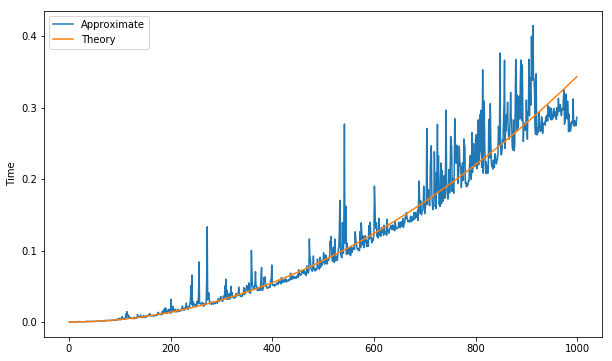

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6))

def func(x, a):
    return a * x * x
# print(res1[:10], res2[:10])
popt, pcov = curve_fit(func, res1, res2, p0=(0))
# print(popt)
plt.plot(res1, res2, label='Approximate')
plt.plot(res1, func(res1, popt), label='Theory')
plt.ylabel('Time')
plt.legend()
plt.show()

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6))

def build_plot_const(n, fun):
    figure(num=None, figsize=(10, 6))
    res1 = []
    res2 = []
    for i in tqdm(range (1, n)):
        times = []
        for _ in range(5):
            arr = np.random.rand(i)
            ts1 = time.time()
            arr = const(arr)
            ts2 = time.time()
            times.append(ts2-ts1)
        res1.append(i)
        res2.append(sum(times)/5)
    th_res = [0 for i in range(1, n)]
    plt.plot(res1, res2, label='Approximate')
    plt.plot(res1, th_res, label='Theory')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

<Figure size 720x432 with 0 Axes>

100%|██████████| 1999/1999 [00:00<00:00, 10131.99it/s]


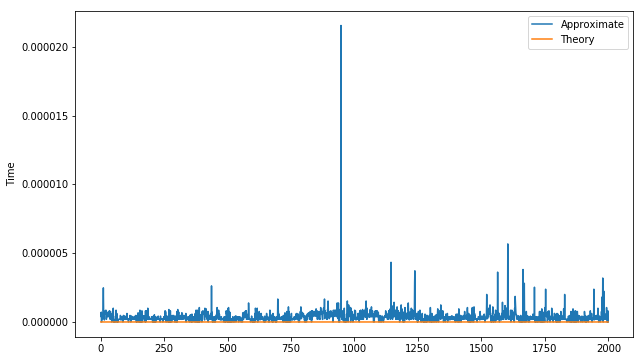

In [13]:
build_plot_const(2000, const)

In [16]:
def build_plot(n, fun, appr_fun, s_v):
    figure(num=None, figsize=(10, 6))
    res1 = []
    res2 = []
    for i in tqdm(range (1, n)):
        times = []
        for _ in range(5):
            arr = np.random.rand(i)
            ts1 = time.time()
            arr = fun(arr)
            ts2 = time.time()
            times.append(ts2-ts1)
        res1.append(i)
        res2.append(sum(times)/5)
    popt, pcov = curve_fit(appr_fun, res1, res2, p0=s_v)
    plt.plot(res1, res2, label='Approximate')
    plt.plot(res1, appr_fun(res1, popt), label='Theory')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

100%|██████████| 1999/1999 [00:01<00:00, 1119.90it/s]


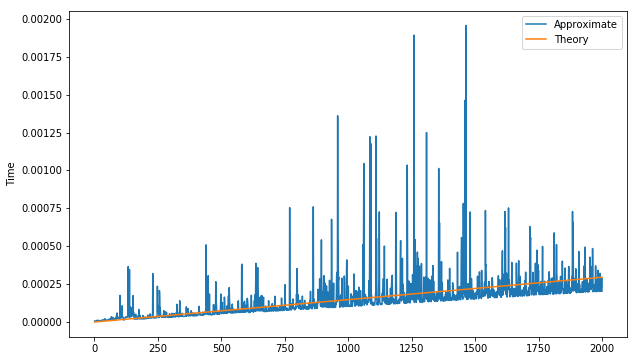

In [17]:
build_plot(2000, summ, lambda x, a1: a1 * x, (0))

100%|██████████| 1999/1999 [00:02<00:00, 884.33it/s] 


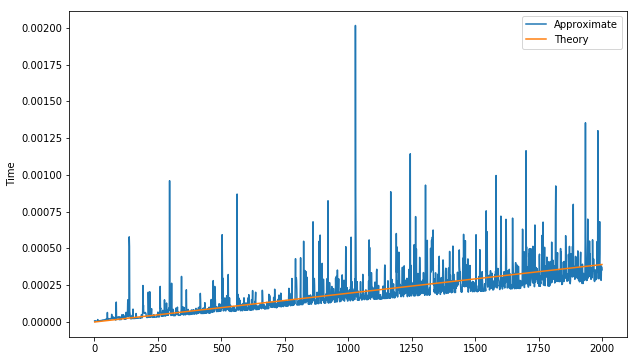

In [18]:
build_plot(2000, prod, lambda x, a1: a1 * x, (0))

100%|██████████| 1499/1499 [00:03<00:00, 382.49it/s]


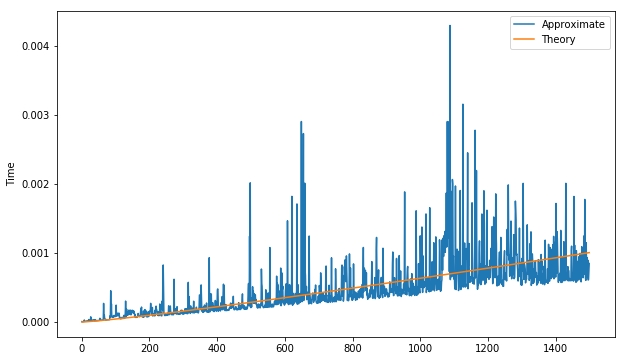

In [19]:
build_plot(1500, polin, lambda x, a: x * np.log(x) * a, (0))

100%|██████████| 1999/1999 [00:06<00:00, 310.63it/s]


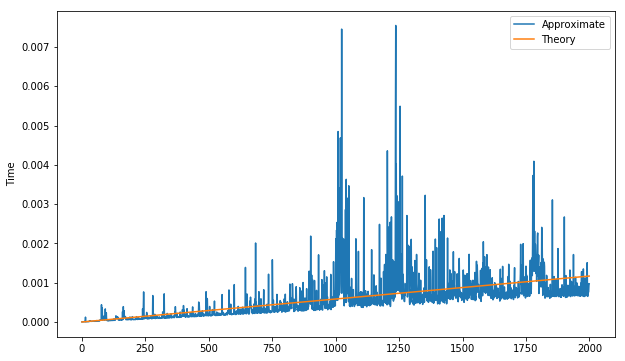

In [20]:
build_plot(2000, horner, lambda x, a1: a1 * x, (0))

In [21]:
def build_plot_sort(n, fun, appr_fun, s_v):
    figure(num=None, figsize=(10, 6))
    res1 = []
    res2 = []
    for i in tqdm(range (1, n)):
        times = []
        for _ in range(5):
            arr = np.random.rand(i)
            ts1 = time.time()
            arr = fun(arr, 0, i-1)
            ts2 = time.time()
            times.append(ts2-ts1)
        res1.append(i)
        res2.append(sum(times)/5)
    popt, pcov = curve_fit(appr_fun, res1, res2, p0=s_v)
    plt.plot(res1, res2, label='Approximate')
    plt.plot(res1, appr_fun(res1, *popt), label='Theory')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

100%|██████████| 1999/1999 [01:23<00:00, 12.17it/s]


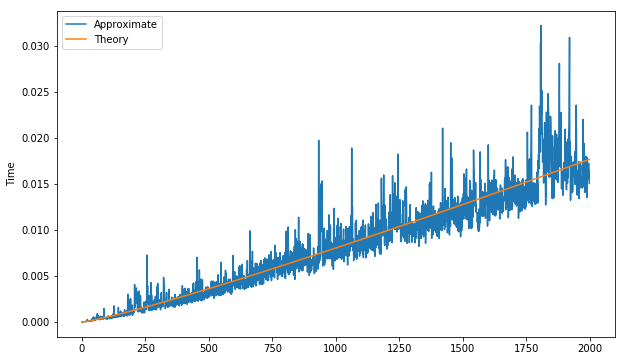

In [22]:
build_plot_sort(2000, quickSort, lambda x, a: x * np.log(x) * a, (0))

In [32]:
def build_plot_timsort(n, fun, appr_fun, s_v):
    figure(num=None, figsize=(10, 6))
    res1 = []
    res2 = []
    for i in tqdm(range (1, n)):
        times = []
        for _ in range(5):
            arr = np.random.rand(i)
            ts1 = time.time()
            arr = sorted(arr)
            ts2 = time.time()
            times.append(ts2-ts1)
        res1.append(i)
        res2.append(sum(times)/5)    
    popt, pcov = curve_fit(appr_fun, res1, res2, p0=s_v)
    plt.plot(res1, res2, label='Approximate')
    plt.plot(res1, appr_fun(res1, *popt), label='Theory')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

100%|██████████| 1999/1999 [00:04<00:00, 449.52it/s]


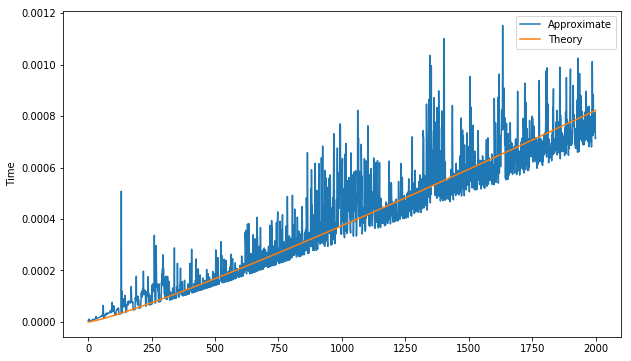

In [33]:
build_plot_timsort(2000, timSort, lambda x, a: x * np.log(x) * a, (0))

In [34]:
from random import randint

def create_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append([randint(1, 1000) for _ in range(n)])
    return matrix

def mulpiply(A, B):
    result = [[sum(a * b for a, b in zip(A_row, B_col))  
                        for B_col in zip(*B)] 
                                for A_row in A] 
    return result

def build_plot_multiply_matrices(n, fun, appr_fun, s_v):
    figure(num=None, figsize=(10, 6))
    res1 = []
    res2 = []
    for i in tqdm(range (1, n)):
        times = []
        for _ in range(5):
            m1 = create_matrix(i)
            m2 = create_matrix(i)
            ts1 = time.time()
    #         print(len(arr))
            result_matrix = mulpiply(m1, m2)
            ts2 = time.time()
            times.append(ts2-ts1)
        res1.append(i)
        res2.append(sum(times)/5)
    popt, pcov = curve_fit(appr_fun, res1, res2, p0=s_v)
#     print(res1, popt)
    plt.plot(res1, res2, label='Approximate')
    plt.plot(res1, appr_fun(res1, *popt), label='Theory')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

100%|██████████| 99/99 [00:25<00:00,  1.10it/s] 


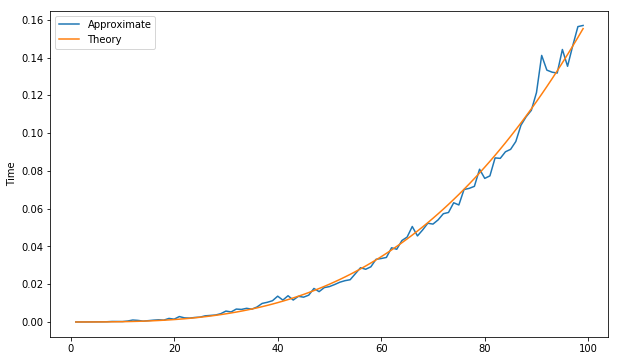

In [35]:
build_plot_multiply_matrices(100, mulpiply, lambda x, a: np.array(x)*np.array(x)*np.array(x) * a, (0))